<a href="https://colab.research.google.com/github/Harallambos/AI/blob/main/TEST_CTDETECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TESTING OUR MODEL WITH THE TEST DATASET

In [2]:
# TENSORFLOW
from tensorflow.keras import regularizers

# Importing Libraries and Tools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns

# CLASSIFICATION ALGORITHMS
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import Normalizer
from sklearn import metrics

# Resambling - Algorithm Evaluetion Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier



# Feature selection algorithm
from sklearn import svm

# KERAS
from keras.models import Sequential
from keras.layers import Input, Dense
from keras.models import Model

# NUMPY
import numpy
from numpy.random import seed
from numpy import ndarray

In [3]:
# Names is the list with all variable names. 
names = ['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.len', 
         'frame.cap_len', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.length', 
         'radiotap.present.tsft', 'radiotap.present.flags', 'radiotap.present.rate', 'radiotap.present.channel', 
         'radiotap.present.fhss', 'radiotap.present.dbm_antsignal', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 
         'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 
         'radiotap.present.antenna', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.rxflags', 
         'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 
         'radiotap.present.reserved', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 
         'radiotap.mactime', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap.flags.frag', 
         'radiotap.flags.fcs', 'radiotap.flags.datapad', 'radiotap.flags.badfcs', 'radiotap.flags.shortgi', 
         'radiotap.datarate', 'radiotap.channel.freq', 'radiotap.channel.type.turbo', 'radiotap.channel.type.cck', 
         'radiotap.channel.type.ofdm', 'radiotap.channel.type.2ghz', 'radiotap.channel.type.5ghz', 'radiotap.channel.type.passive', 
         'radiotap.channel.type.dynamic', 'radiotap.channel.type.gfsk', 'radiotap.channel.type.gsm', 'radiotap.channel.type.sturbo', 
         'radiotap.channel.type.half', 'radiotap.channel.type.quarter', 
         'radiotap.dbm_antsignal', 'radiotap.antenna', 'radiotap.rxflags.badplcp', 'wlan.fc.type_subtype', 'wlan.fc.version', 
         'wlan.fc.type', 'wlan.fc.subtype', 'wlan.fc.ds', 'wlan.fc.frag', 'wlan.fc.retry', 'wlan.fc.pwrmgt', 'wlan.fc.moredata', 
         'wlan.fc.protected', 'wlan.fc.order', 'wlan.duration', 'wlan.ra', 'wlan.da', 'wlan.ta', 'wlan.sa', 'wlan.bssid', 
         'wlan.frag', 'wlan.seq', 'wlan.bar.type', 'wlan.ba.control.ackpolicy', 'wlan.ba.control.multitid', 'wlan.ba.control.cbitmap', 
         'wlan.bar.compressed.tidinfo', 'wlan.ba.bm', 'wlan.fcs_good', 'wlan_mgt.fixed.capabilities.ess', 
         'wlan_mgt.fixed.capabilities.ibss', 'wlan_mgt.fixed.capabilities.cfpoll.ap', 'wlan_mgt.fixed.capabilities.privacy', 
         'wlan_mgt.fixed.capabilities.preamble', 'wlan_mgt.fixed.capabilities.pbcc', 'wlan_mgt.fixed.capabilities.agility', 
         'wlan_mgt.fixed.capabilities.spec_man', 'wlan_mgt.fixed.capabilities.short_slot_time', 'wlan_mgt.fixed.capabilities.apsd', 
         'wlan_mgt.fixed.capabilities.radio_measurement', 'wlan_mgt.fixed.capabilities.dsss_ofdm', 
         'wlan_mgt.fixed.capabilities.del_blk_ack', 'wlan_mgt.fixed.capabilities.imm_blk_ack', 'wlan_mgt.fixed.listen_ival', 
         'wlan_mgt.fixed.current_ap', 'wlan_mgt.fixed.status_code', 'wlan_mgt.fixed.timestamp', 'wlan_mgt.fixed.beacon', 
         'wlan_mgt.fixed.aid', 'wlan_mgt.fixed.reason_code', 'wlan_mgt.fixed.auth.alg', 'wlan_mgt.fixed.auth_seq', 
         'wlan_mgt.fixed.category_code', 'wlan_mgt.fixed.htact', 'wlan_mgt.fixed.chanwidth', 'wlan_mgt.fixed.fragment', 
         'wlan_mgt.fixed.sequence', 'wlan_mgt.tagged.all', 'wlan_mgt.ssid', 'wlan_mgt.ds.current_channel', 'wlan_mgt.tim.dtim_count', 
         'wlan_mgt.tim.dtim_period', 'wlan_mgt.tim.bmapctl.multicast', 'wlan_mgt.tim.bmapctl.offset', 
         'wlan_mgt.country_info.environment', 'wlan_mgt.rsn.version', 'wlan_mgt.rsn.gcs.type', 'wlan_mgt.rsn.pcs.count', 
         'wlan_mgt.rsn.akms.count', 'wlan_mgt.rsn.akms.type', 'wlan_mgt.rsn.capabilities.preauth', 
         'wlan_mgt.rsn.capabilities.no_pairwise', 'wlan_mgt.rsn.capabilities.ptksa_replay_counter', 
         'wlan_mgt.rsn.capabilities.gtksa_replay_counter', 'wlan_mgt.rsn.capabilities.mfpr', 'wlan_mgt.rsn.capabilities.mfpc', 
         'wlan_mgt.rsn.capabilities.peerkey', 'wlan_mgt.tcprep.trsmt_pow', 'wlan_mgt.tcprep.link_mrg', 
         'wlan.wep.iv', 'wlan.wep.key', 'wlan.wep.icv', 'wlan.tkip.extiv', 'wlan.ccmp.extiv', 'wlan.qos.tid', 'wlan.qos.priority', 
         'wlan.qos.eosp', 'wlan.qos.ack', 'wlan.qos.amsdupresent', 'wlan.qos.buf_state_indicated', 'wlan.qos.bit4', 
         'wlan.qos.txop_dur_req', 'wlan.qos.buf_state_indicated2', 'data.len', 'class']

# We give the variable names from the list that we have created above to the columns of our dataset. Adding labels in our data.
data = pd.read_csv('test_imperson_without4n7_balanced_data.csv', names=names)
data

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len,frame.marked,frame.ignored,radiotap.version,radiotap.pad,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.rate,radiotap.present.channel,radiotap.present.fhss,radiotap.present.dbm_antsignal,radiotap.present.dbm_antnoise,radiotap.present.lock_quality,radiotap.present.tx_attenuation,radiotap.present.db_tx_attenuation,radiotap.present.dbm_tx_power,radiotap.present.antenna,radiotap.present.db_antsignal,radiotap.present.db_antnoise,radiotap.present.rxflags,radiotap.present.xchannel,radiotap.present.mcs,radiotap.present.ampdu,radiotap.present.vht,radiotap.present.reserved,radiotap.present.rtap_ns,radiotap.present.vendor_ns,radiotap.present.ext,radiotap.mactime,radiotap.flags.cfp,radiotap.flags.preamble,radiotap.flags.wep,radiotap.flags.frag,...,wlan_mgt.fixed.fragment,wlan_mgt.fixed.sequence,wlan_mgt.tagged.all,wlan_mgt.ssid,wlan_mgt.ds.current_channel,wlan_mgt.tim.dtim_count,wlan_mgt.tim.dtim_period,wlan_mgt.tim.bmapctl.multicast,wlan_mgt.tim.bmapctl.offset,wlan_mgt.country_info.environment,wlan_mgt.rsn.version,wlan_mgt.rsn.gcs.type,wlan_mgt.rsn.pcs.count,wlan_mgt.rsn.akms.count,wlan_mgt.rsn.akms.type,wlan_mgt.rsn.capabilities.preauth,wlan_mgt.rsn.capabilities.no_pairwise,wlan_mgt.rsn.capabilities.ptksa_replay_counter,wlan_mgt.rsn.capabilities.gtksa_replay_counter,wlan_mgt.rsn.capabilities.mfpr,wlan_mgt.rsn.capabilities.mfpc,wlan_mgt.rsn.capabilities.peerkey,wlan_mgt.tcprep.trsmt_pow,wlan_mgt.tcprep.link_mrg,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,wlan.tkip.extiv,wlan.ccmp.extiv,wlan.qos.tid,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class
0,0,0,0,0.002547,0.002547,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88219,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.222150,0.00000,0.47729,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
1,0,0,0,0.003296,0.003296,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.351060,0.00000,0.18516,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
2,0,0,0,0.003285,0.003285,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.437000,0.00000,0.47541,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
3,0,0,0,0.005942,0.005942,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.000000,0
4,0,0,0,0.001519,0.001519,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.636210,0.00000,0.89971,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40153,0,0,0,0.001682,0.001682,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.32183,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1
40154,0,0,0,0.002361,0.002361,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0,0,0.0,0.0,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.48142,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1
40155,0,0,0,0.002971,0.002971,0.016993,0

In [4]:
# We load our data values to an array called "array"
# Create an array "X" with all the values of the input variables
# Crate an array "Y" with all the values of our output variable "Class"
array = data.values
X = array[:,0:152]
Y = array[:,152]
X

array([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.98674  ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.98674  ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.98674  ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0026525],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0026525],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.0026525]])

# AUTOENCODER

In [5]:
# EXECUTION TIME ---> 0.5 sec
# BUILD THE AUTOENCODER

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# Number of Columns are 152 for our input data
ncol = 152

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)


### AN EXAMPLE OF DEEP AUTOENCODER WITH MULTIPLE LAYERS
# InputLayer      (None, 152)
#      Dense      (None, 100)
#      Dense      (None, 50)
#      Bottleneck (None, 10)
#      Dense      (None, 50)
#      Dense      (None, 100)
#      Dense      (None, 152)
 
input_dim = Input(shape = (ncol, ))

# DEFINE THE DIMENSION OF ENCODER ASSUMED 10 (This will be our Bottlenech meaning the number of our new created features from our 2 layer encoding)
encoding_dim = 10

# DEFINE THE ENCODER LAYERS
encoded1 = Dense(100, activation = 'relu')(input_dim)
encoded2 = Dense(50, activation = 'relu')(encoded1)
bottleneck = Dense(encoding_dim, activation = 'relu')(encoded2)

# DEFINE THE DECODER LAYERS
decoded1 = Dense(50, activation = 'relu')(bottleneck)
decoded2 = Dense(100, activation = 'relu')(decoded1)
decoded3 = Dense(ncol, activation = 'sigmoid')(decoded2)

# COMBINE ENCODER AND DECODER INTO AN AUTOENCODER MODEL
autoencoder = Model(input_dim, decoded3)
autoencoder.summary()

# CONFIGURE AND TRAIN THE AUTOENCODER
autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs = 100, batch_size = 100, shuffle = True, validation_data = (X_test, X_test))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 152)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               15300     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                510       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                550       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_5 (Dense)              (None, 152)               15352 

# EXTRACTED NEW FEATURES

In [6]:
# THE ENCODER TO EXTRACT THE REDUCED DIMENSION FROM THE ABOVE AUTOENCODER
encoder = Model(input_dim, bottleneck)
encoded_input = Input(shape = (encoding_dim, ))
extracted_features = encoder.predict(X)               # We extract our 10 new fetures using the encoder and the predict function. We put as parameter our input data that are stopred in the array "X"
extracted_features.shape

(40158, 10)

# COMBINED DATA

In [7]:
# Addinf the extracted bew features from the encoder to a new dataframe called "new data"
new_data = pd.DataFrame(extracted_features)
#new_data

# Cocating "new_data" 10 new features with the original data frame "data" to a concated dataframe called "data_changed"
data_changed = pd.concat([data,new_data], axis=1)
data_changed

,frame.interface_id,frame.dlt,frame.offset_shift,frame.time_delta,frame.time_delta_displayed,frame.len,frame.cap_len,frame.marked,frame.ignored,radiotap.version,radiotap.pad,radiotap.length,radiotap.present.tsft,radiotap.present.flags,radiotap.present.rate,radiotap.present.channel,radiotap.present.fhss,radiotap.present.dbm_antsignal,radiotap.present.dbm_antnoise,radiotap.present.lock_quality,radiotap.present.tx_attenuation,radiotap.present.db_tx_attenuation,radiotap.present.dbm_tx_power,radiotap.present.antenna,radiotap.present.db_antsignal,radiotap.present.db_antnoise,radiotap.present.rxflags,radiotap.present.xchannel,radiotap.present.mcs,radiotap.present.ampdu,radiotap.present.vht,radiotap.present.reserved,radiotap.present.rtap_ns,radiotap.present.vendor_ns,radiotap.present.ext,radiotap.mactime,radiotap.flags.cfp,radiotap.flags.preamble,radiotap.flags.wep,radiotap.flags.frag,...,wlan_mgt.rsn.version,wlan_mgt.rsn.gcs.type,wlan_mgt.rsn.pcs.count,wlan_mgt.rsn.akms.count,wlan_mgt.rsn.akms.type,wlan_mgt.rsn.capabilities.preauth,wlan_mgt.rsn.capabilities.no_pairwise,wlan_mgt.rsn.capabilities.ptksa_replay_counter,wlan_mgt.rsn.capabilities.gtksa_replay_counter,wlan_mgt.rsn.capabilities.mfpr,wlan_mgt.rsn.capabilities.mfpc,wlan_mgt.rsn.capabilities.peerkey,wlan_mgt.tcprep.trsmt_pow,wlan_mgt.tcprep.link_mrg,wlan.wep.iv,wlan.wep.key,wlan.wep.icv,wlan.tkip.extiv,wlan.ccmp.extiv,wlan.qos.tid,wlan.qos.priority,wlan.qos.eosp,wlan.qos.ack,wlan.qos.amsdupresent,wlan.qos.buf_state_indicated,wlan.qos.bit4,wlan.qos.txop_dur_req,wlan.qos.buf_state_indicated2,data.len,class,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0.002547,0.002547,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88219,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.222150,0.00000,0.47729,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0,4.684351,0.0,0.586917,4.921768,4.494948,12.050744,0.0,9.375901,19.532991,3.641756
1,0,0,0,0.003296,0.003296,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.351060,0.00000,0.18516,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0,4.670473,0.0,0.639853,6.324902,3.496016,11.512968,0.0,9.857646,18.993944,3.090018
2,0,0,0,0.003285,0.003285,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.437000,0.00000,0.47541,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0,4.222302,0.0,0.636986,5.010545,4.030854,12.281579,0.0,9.835094,18.846581,3.521839
3,0,0,0,0.005942,0.005942,0.000000,0.000000,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.00000,0.00000,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.000000,0,11.070605,0.0,2.512757,6.655388,12.555658,9.990478,0.0,9.553048,10.486883,0.989162
4,0,0,0,0.001519,0.001519,0.988240,0.988240,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.88220,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.636210,0.00000,0.89971,0.0,0.0,0.16667,0.16667,0,0,0,0,0,0,0,0.986740,0,5.247999,0.0,4.030133,0.838251,2.411412,12.806071,0.0,8.390245,18.667912,4.877778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40153,0,0,0,0.001682,0.001682,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.32183,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0,0.002652,1,3.212460,0.0,2.426686,10.279912,9.242218,3.411432,0.0,4.647120,15.875881,10.832942
40154,0,0,0,0.002361,0.002361,0.016993,0.016993,0,0,0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0.97831,0,0,0,0,...,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0.000005,0.33333,0.48142,0.0,0.0,0.00000,0.00000,0,0,0,0,0,0,0

# UPDATE THE VARIABLE NAMES LIST

In [8]:
names_changed = []
for col_name in data_changed.columns: 
    #print(col_name)
    names_changed.append(col_name)

print(len(names_changed))
print(names_changed)

163
['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.len', 'frame.cap_len', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.length', 'radiotap.present.tsft', 'radiotap.present.flags', 'radiotap.present.rate', 'radiotap.present.channel', 'radiotap.present.fhss', 'radiotap.present.dbm_antsignal', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.antenna', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.rxflags', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.reserved', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.mactime', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap

# LOADING OUR INPUT AND OUTPUT DATA 
Loading our new input data to array "X" and the target data in the array "Y"

In [9]:
# Loading the new changed date to X array with 162 inputs and to Y array with 1 output "class"
array_changed = data_changed.values
 
# We know that the variable class is still in position 152 in the "changed_data" dataframe as the 10 new features are added at the end.  
Y = array_changed[:,152]      
Y.shape, Y

((40158,), array([0., 0., 0., ..., 1., 1., 1.]))

In [10]:
# We need now to drop the column "class" from the "changed_dataframe" and sort all the left values to the X array.   !!!!!!!!!  CAREFUL   !!!!!!!!   If this code is executed the column with name "class" 
# which is our target variable is now deleted from our dataset. 
del data_changed['class']
data_changed.shape, data_changed

((40158, 162),        frame.interface_id  frame.dlt  ...          8          9
 0                       0          0  ...  19.532991   3.641756
 1                       0          0  ...  18.993944   3.090018
 2                       0          0  ...  18.846581   3.521839
 3                       0          0  ...  10.486883   0.989162
 4                       0          0  ...  18.667912   4.877778
 ...                   ...        ...  ...        ...        ...
 40153                   0          0  ...  15.875881  10.832942
 40154                   0          0  ...  14.956784  10.514305
 40155                   0          0  ...  14.194378  10.107352
 40156                   0          0  ...  13.721306  11.179535
 40157                   0          0  ...  14.334881  11.529827
 
 [40158 rows x 162 columns])

In [11]:
# Loading the new changed date to X array with 162 inputs and to Y array with 1 output "class"
array_changed = data_changed.values
 
# Storing all the input values from the dataframe to the X input array
X = array_changed[:,0:162]
X.shape

(40158, 162)

# UPDATE NAMES LIST AFTER CHANGING THE DATAFRAME

In [12]:
names_changed = []
for col_name in data_changed.columns: 
    #print(col_name)
    names_changed.append(col_name)

print(len(names_changed))
print(names_changed)

162
['frame.interface_id', 'frame.dlt', 'frame.offset_shift', 'frame.time_delta', 'frame.time_delta_displayed', 'frame.len', 'frame.cap_len', 'frame.marked', 'frame.ignored', 'radiotap.version', 'radiotap.pad', 'radiotap.length', 'radiotap.present.tsft', 'radiotap.present.flags', 'radiotap.present.rate', 'radiotap.present.channel', 'radiotap.present.fhss', 'radiotap.present.dbm_antsignal', 'radiotap.present.dbm_antnoise', 'radiotap.present.lock_quality', 'radiotap.present.tx_attenuation', 'radiotap.present.db_tx_attenuation', 'radiotap.present.dbm_tx_power', 'radiotap.present.antenna', 'radiotap.present.db_antsignal', 'radiotap.present.db_antnoise', 'radiotap.present.rxflags', 'radiotap.present.xchannel', 'radiotap.present.mcs', 'radiotap.present.ampdu', 'radiotap.present.vht', 'radiotap.present.reserved', 'radiotap.present.rtap_ns', 'radiotap.present.vendor_ns', 'radiotap.present.ext', 'radiotap.mactime', 'radiotap.flags.cfp', 'radiotap.flags.preamble', 'radiotap.flags.wep', 'radiotap

# TRAIN TEST SPLIT

In [13]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

# split into 67% for train and 33% for test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=seed)

# FEATURE IMPORTANCE

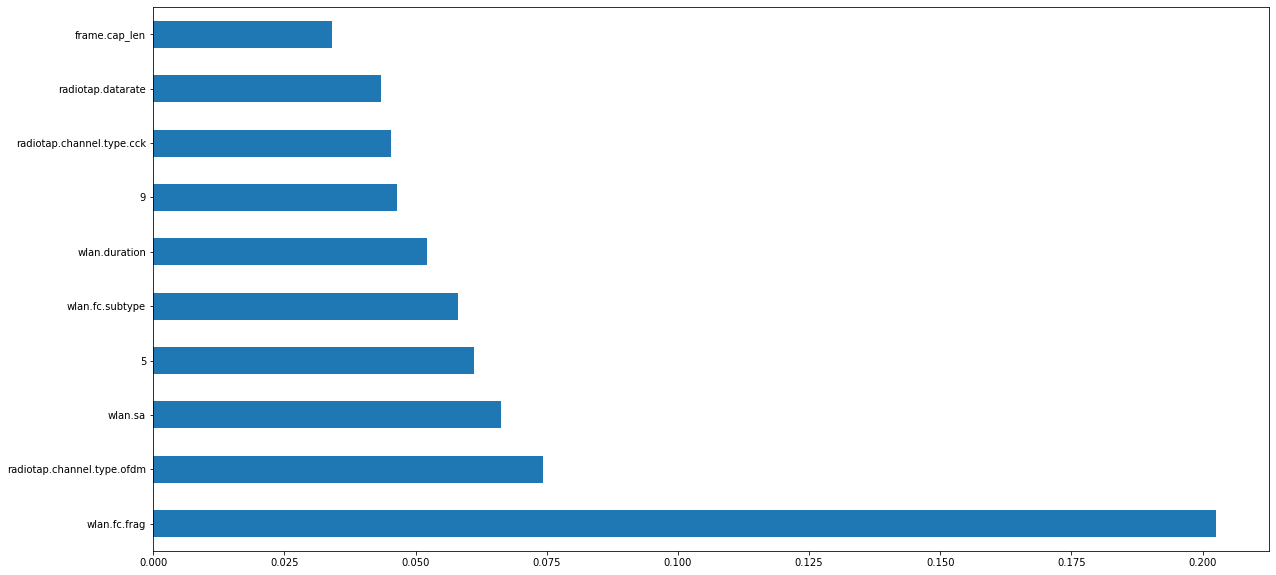

In [23]:
# EXECUTION TIME ---> 5.3 sec
# Feature Importance using ExtraTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier 
import matplotlib.pyplot as plt 

model = ExtraTreesClassifier() 
model.fit(X,Y)

feat_importances = pd.Series(model.feature_importances_, index=names_changed) 
feat_importances.nlargest(10).plot(kind='barh',figsize=(20,10)) 

# UNIVARIATE SELECTION

In [18]:
# EXECUTION TIME ---> 0.6 sec
# UNIVARIATE SELECTION
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


#apply SelectKBest class to extract top 10 best features 
bestfeatures = SelectKBest(score_func=chi2, k=10) 
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(data_changed.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1) 
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                          Specs         Score
157                           5  83324.798720
161                           9  60048.979201
152                           0  22244.130317
66                 wlan.fc.frag  18606.000000
48   radiotap.channel.type.ofdm  14384.000000
155                           3  10846.365372
44            radiotap.datarate  10768.716176
64              wlan.fc.subtype  10488.355101
76                      wlan.sa   9709.624579
47    radiotap.channel.type.cck   8044.593432


# RFE

In [19]:
# EXECUTION TIME ---> 159 sec
# RFE
# The code block below uses RFE with the logistic regression algorithm to select the top 10 features. The choice of algorithm does not matter too much as long as it is skillful and consistent.

# Feature Extraction with RFE ------ (EXECUTED IN 154 sec )
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='liblinear')
rfe = RFE(model, 10)    # Choosing top 10
fit = rfe.fit(X, Y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 10
Selected Features: [False False False False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False  True
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False  True False False  True False False False False False
 False  True False False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False  True False False False
 False False False False False False False False False False False  True
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fa

# FEATURES SELECTED
TOP 10 FEATURES SELECTED
The 10 top features we are going to select after combining the results from all 3 Selection methods are:


1. 5(this is one of our new extracted features from the autoencoder)
2. 9(this is one of our new extracted features from the autoencoder)
3. radiotap.datarate
4. wlan.fc.ds
5. wlan.fc.frag
6. radiotap.channel.type.cck
7. radiotap.channel.type.ofdm
8. wlan.fc.subtype
9. wlan.sa
10. wlan.duration


# BUILD NEWE DATAFRAME

In [25]:
# EXECUTION TIME ---> 0.5 sec
# Selecting the 10 new features for our dataset this will be temporary dataset as we will need to add the 'class' variable.
selected_features_temp = data_changed.filter(regex='5|9|radiotap.datarate|wlan.fc.ds|wlan.fc.frag|radiotap.channel.type.cck|radiotap.channel.type.ofdm|wlan.fc.subtype|wlan.sa|wlan.duration')
del selected_features_temp['radiotap.channel.type.5ghz'] # Was addin this variable and I had to delete it.... Don't know why
selected_features_temp

# We will need also to add the column 'class' to our dataset at the end of the dataset as this is our target data.
class_variable = data.filter(regex='class')
class_variable

# OUR final dataframe with our 10 new selected features as input features and the 'class' feature as target feature
selected_features = pd.concat([selected_features_temp,class_variable], axis=1)
selected_features

,radiotap.datarate,radiotap.channel.type.cck,radiotap.channel.type.ofdm,wlan.fc.subtype,wlan.fc.ds,wlan.fc.frag,wlan.duration,wlan.sa,5,9,class
0,1.00000,0,1,0.61538,1.0,0,0.003034,0.000128,12.050744,3.641756,0
1,1.00000,0,1,0.61538,1.0,0,0.003034,0.000128,11.512968,3.090018,0
2,1.00000,0,1,0.61538,1.0,0,0.003034,0.000128,12.281579,3.521839,0
3,0.43396,0,1,1.00000,0.0,0,0.000000,0.000000,9.990478,0.989162,0
4,1.00000,0,1,0.61538,1.0,0,0.003034,0.000128,12.806071,4.877778,0
...,...,...,...,...,...,...,...,...,...,...,...
40153,0.00000,1,0,0.00000,1.0,1,0.021655,0.165920,3.411432,10.832942,1
40154,0.00000,1,0,0.00000,1.0,1,0.021655,0.165920,3.213478,10.514305,1
40155,0.00000,1,0,0.00000,1.0,1,0.021655,0.165920,2.447716,10.107352,1
40156,0.00000,1,0,0.00000,1.0,1,0.021655,0.997950,0.922409,11.179535,1


# CHOOSING CLASSIFICATIONS METHOD
<br>
<br>
<br>
COMPARING MACHINE LEARNING ALGORITHMS
<br>
<br>
<br>
• Logistic Regression.
<br>
• Linear Discriminant Analysis.
<br>
• k-Nearest Neighbors.
<br>
• Classification and Regression Trees.
<br>
• Naive Bayes.
<br>
• Support Vector Machines.


LR: 0.970940 (0.002447)
LDA: 0.956049 (0.002491)
KNN: 0.997136 (0.000765)
CART: 0.997087 (0.000756)
NB: 0.962872 (0.001606)
SVM: 0.988695 (0.001877)


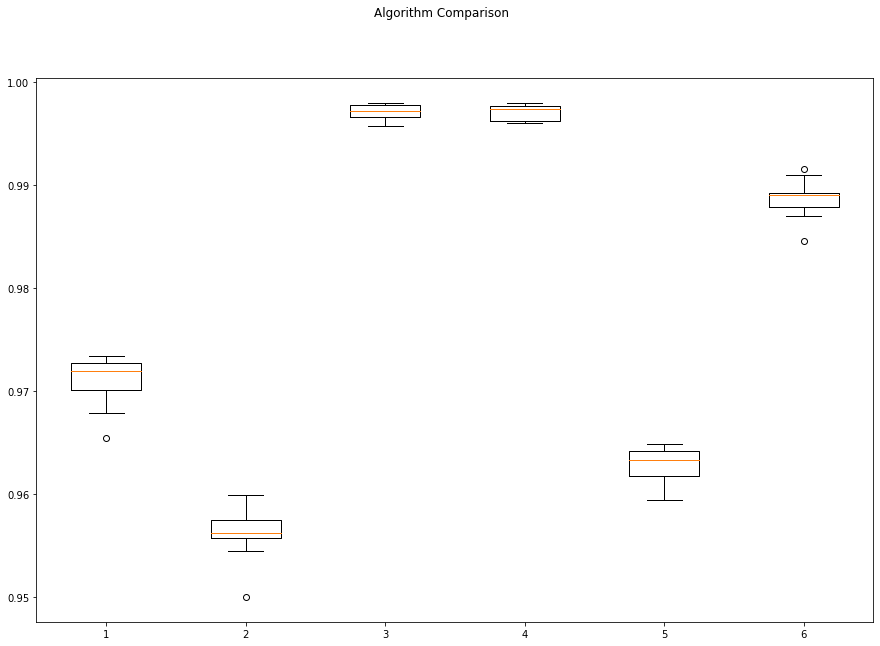

In [26]:
# EXECUTION TIME ---> 843 sec
# Compare Algorithms
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# load dataset
f_array = selected_features.values
f_X = f_array[:,0:10]
f_Y = f_array[:,10]

# prepare models
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
 kfold = KFold(n_splits=10, random_state=7,shuffle=True)
 cv_results = cross_val_score(model, f_X, f_Y, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax

# RESULTS
# ----------------
# LR: 0.970940 (0.002447)
# LDA: 0.956049 (0.002491)
# KNN: 0.997136 (0.000765)
# CART: 0.997087 (0.000756)
# NB: 0.962872 (0.001606)
# SVM: 0.988695 (0.001877)


# CONFUSION MATRIX FOR CART

In [27]:
# EXECUTION TIME ---> 0.9 sec
# Confusion matrix --- FOR CART
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, plot_tree

# load dataset
f_array = selected_features.values
f_X = f_array[:,0:10]
f_Y = f_array[:,10]

test_size = 0.1
seed = 7

# split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(f_X, f_Y, test_size=test_size, random_state=seed)

# fit a model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
predicted = model.predict(X_test)

print(confusion_matrix(Y_test,predicted))


[[2004    8]
 [   7 1997]]


EVALUATION AND ANALYSIS
The confusion matrix is commonly used to evaluate the performance of a ML model, particularly for binary classification which is the case in this study. Based on the confusion matrix, the below evaluations measures are intended to give information on the effectiveness and efficiency of the proposed algorithm. The evaluation measure used are accuracy (Acc), detection rate (DR), false alarm rate (FAR), F-measure (F1), Mathew’s correlation coefficient (Mcc) and Time To Build (TTB) and can be calculated using the below equations.


<br>
Acc = TP + TN / TP + TN + FP + FN
<br>
DR (recall) = TP / TP + FN
<br>
Precision = TP / TP + FP
<br>
FAR = FP / TN + FP
<br>
FNR = FN / FN + TP
<br>
F1 = 2TP / 2TP + FP + FN
<br>
Mcc= (TP ∗ TN)−(FP ∗ FN) / √ (TP+FP) (TP+FN) (TN +FP) (TN +FN)
<br>

Checking in the confusion matrix:
<br>
True Positive TP = 2004
<br>
False Positive FP = 7
<br>
True Negative TN = 1997
<br>
False Negative FN = 8

In [31]:
# CART
import math as mt
# We will calculate these evaluation metrics for the CART ALGORITHM
# True Positive 
TP = 2004
# False Positive 
FP = 7
# True Negative 
TN = 1997
# False Negative 
FN = 8

# Accuracy
Acc = (TP + TN )/ (TP + TN + FP + FN)
# Detection Rate
DR = TP / (TP + FN)
# Precision
Precision = TP / (TP + FP)
# False Alarm
FAR = FP / (TN + FP)
# Type error 2
FNR = FN / (FN + TP)
# F1
F1 = 2*TP / (2*TP + FP + FN)
# Matthews Correlation Coefficient
Mcc = ((TP*TN)-(FP*FN))/ mt.sqrt((TP+FP)*(TP+FN)*(TN +FP)*(TN +FN))

Acc*100, DR*100, Precision*100, FAR*100, FNR*100, F1*100, Mcc*100


# RESULTS
# -----------------------------------------------------------------------------------------------
#  Acc                  DR                  Precision           FAR                   FNR                   F1                  Mcc
#  (99.62649402390437, 99.60238568588468, 99.65191447041273, 0.34930139720558884, 0.3976143141153081, 99.62714392244594, 99.25299813262572)

(99.62649402390437,
 99.60238568588468,
 99.65191447041273,
 0.34930139720558884,
 0.3976143141153081,
 99.62714392244594,
 99.25299813262572)